Chapter 4: POS tagging

The zip archive alice.zip contains the novel, Alice’s Adventures in Wonderland (written by Lewis Carroll) distributed on Project Gutenberg, as a text file alice.txt. Apply a part-of-speech (POS) tagger to the text file, and store the result in another file. Implement programs that read the POS tagging result and perform the jobs.

For your convenience, the zip archive also includes alice.txt.conll, the novel with part-of-speech labels predicted by Stanford CoreNLP. It may be a good idea to use matplotlib or Gnuplot for the problems 37, 38, and 39.

Before starting

In [2]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [17]:
from nltk.corpus import gutenberg
alice = gutenberg.words('/Users/wdy940211/Desktop/alice.txt')
print(len(alice))
alice_sents = gutenberg.sents('/Users/wdy940211/Desktop/alice.txt')
print(len(alice_sents))
print(alice_sents[0])
alice_paras = gutenberg.paras('/Users/wdy940211/Desktop/alice.txt')
print(len(alice_paras))

34117
1706
['ALICE', "'", 'S', 'ADVENTURES', 'IN', 'WONDERLAND']
819


In [38]:
# the count of a single word in the text
print(alice.count('Alice'))
# all words in the whole text
vocab = nltk.FreqDist(alice)
# how many words in total
print(len(vocab))
# the most frequent 20 words
print(vocab.most_common(20))

395
3022
[(',', 1993), ("'", 1731), ('the', 1527), ('and', 802), ('.', 766), ('to', 725), ('a', 615), ('I', 543), ('it', 527), ('she', 509), ('of', 500), ('said', 456), (",'", 397), ('Alice', 395), ('in', 356), ('was', 352), ('you', 345), ("!'", 278), ('that', 275), ('as', 246)]
[('said', 456), ('Alice', 395), ('that', 275), ('with', 176), ('they', 129), ('very', 126), ('little', 125), ('this', 113), ('down', 99), ('about', 94), ('what', 93), ('them', 88), ('know', 86), ('were', 85), ('like', 84), ('went', 83), ('again', 83), ('herself', 83), ('thought', 74), ('Queen', 74), ('could', 73), ('have', 73), ('then', 72), ('would', 70), ('when', 69), ('time', 68), ('into', 67), ('there', 65)]


In [39]:
# sort longer words
mc = sorted([w for w in vocab.most_common(80) if len(w[0]) > 3], key=lambda x: x[1], reverse=True)
print(mc)

[('said', 456), ('Alice', 395), ('that', 275), ('with', 176), ('they', 129), ('very', 126), ('little', 125), ('this', 113), ('down', 99), ('about', 94), ('what', 93), ('them', 88), ('know', 86), ('were', 85), ('like', 84), ('went', 83), ('again', 83), ('herself', 83), ('thought', 74), ('Queen', 74), ('could', 73), ('have', 73), ('then', 72), ('would', 70), ('when', 69), ('time', 68), ('into', 67), ('there', 65)]


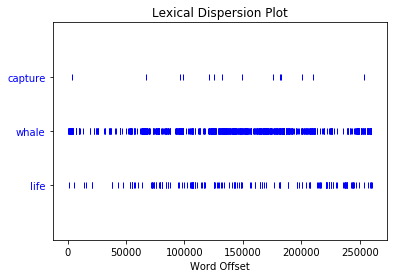

In [41]:
# dispersion plot
text1.dispersion_plot(['capture', 'whale', 'life'])

In [14]:
from nltk.corpus import stopwords
sw = stopwords.words('english')
print(sw[:100])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once']


In [15]:
without_sw = [w for w in without_punc if w not in sw]
print(without_sw[:100])

['ALICE', "'S", 'ADVENTURES', 'IN', 'WONDERLAND', 'Lewis', 'Carroll', 'THE', 'MILLENNIUM', 'FULCRUM', 'EDITION', '3.0', 'CHAPTER', 'I.', 'Down', 'Rabbit-Hole', 'Alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book', 'sister', 'reading', 'pictures', 'conversations', 'use', 'book', 'thought', 'Alice', 'without', 'pictures', 'conversations', 'So', 'considering', 'mind', 'well', 'could', 'hot', 'day', 'made', 'feel', 'sleepy', 'stupid', 'whether', 'pleasure', 'making', 'daisy-chain', 'would', 'worth', 'trouble', 'getting', 'picking', 'daisies', 'suddenly', 'White', 'Rabbit', 'pink', 'eyes', 'ran', 'close', 'There', 'nothing', 'VERY', 'remarkable', 'Alice', 'think', 'VERY', 'much', 'way', 'hear', 'Rabbit', 'say', 'Oh', 'dear', 'Oh', 'dear', 'I', 'shall', 'late', 'thought', 'afterwards', 'occurred', 'ought', 'wondered', 'time', 'seemed', 'quite', 'natural', 'Rabbit', 'actually', 'TOOK', 'A', 'WATCH', 'OUT']


In [55]:
print(len(alice))
print(len(without_punc))
print(len(without_sw))

34117
28720
15334


In [58]:
# stem
from nltk.stem.porter import PorterStemmer
st = PorterStemmer()
for word in without_sw[20:30]:
    print(word, st.stem(word))

get get
tired tire
sitting sit
sister sister
bank bank
nothing noth
twice twice
peeped peep
book book
sister sister


In [59]:
# lemma
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
for word in without_sw[20:30]:
    print(word, wnl.lemmatize(word))

get get
tired tired
sitting sitting
sister sister
bank bank
nothing nothing
twice twice
peeped peeped
book book
sister sister


In [66]:
from nltk.tokenize import sent_tokenize, word_tokenize

s = "Alice's adventures in wonderland."
print(sent_tokenize(s))
s1 = word_tokenize(s)
print(s1)
print(nltk.pos_tag(s))

["Alice's adventures in wonderland."]
['Alice', "'s", 'adventures', 'in', 'wonderland', '.']
[('A', 'DT'), ('l', 'NN'), ('i', 'NN'), ('c', 'VBP'), ('e', 'NN'), ("'", "''"), ('s', 'JJ'), (' ', 'IN'), ('a', 'DT'), ('d', 'NN'), ('v', 'NN'), ('e', 'NN'), ('n', 'JJ'), ('t', 'NN'), ('u', 'JJ'), ('r', 'NN'), ('e', 'NN'), ('s', 'VBD'), (' ', 'NNP'), ('i', 'NN'), ('n', 'VBP'), (' ', 'JJ'), ('w', 'NN'), ('o', 'NN'), ('n', 'JJ'), ('d', 'NN'), ('e', 'NN'), ('r', 'NN'), ('l', 'VBZ'), ('a', 'DT'), ('n', 'JJ'), ('d', 'NN'), ('.', '.')]


In [13]:
l = nltk.pos_tag(without_sw, tagset='universal')
print(l[:30])

[('ALICE', 'NOUN'), ("'S", 'PRT'), ('ADVENTURES', 'NOUN'), ('IN', 'NOUN'), ('WONDERLAND', 'NOUN'), ('Lewis', 'NOUN'), ('Carroll', 'NOUN'), ('THE', 'NOUN'), ('MILLENNIUM', 'NOUN'), ('FULCRUM', 'NOUN'), ('EDITION', 'NOUN'), ('3.0', 'NUM'), ('CHAPTER', 'NOUN'), ('I.', 'NOUN'), ('Down', 'NOUN'), ('Rabbit-Hole', 'NOUN'), ('Alice', 'NOUN'), ('beginning', 'VERB'), ('get', 'VERB'), ('tired', 'ADJ'), ('sitting', 'VERB'), ('sister', 'ADJ'), ('bank', 'NOUN'), ('nothing', 'NOUN'), ('twice', 'ADV'), ('peeped', 'VERB'), ('book', 'NOUN'), ('sister', 'NOUN'), ('reading', 'NOUN'), ('pictures', 'NOUN')]


In [72]:
l = nltk.pos_tag(without_sw)
print(l[0])
print(l[0][1])

('ALICE', 'NNP')
NNP


30. Reading the result
Implement a program that reads the result of part-of-speech tagging. Here, represent a sentence as a list of mapping objects, each of which associates a surface form, lemma (base form), part-of-speech tag with the keys text, lemma, pos. Use this representation in the rest of the problems.

In [31]:
import json
with open('/Users/wdy940211/Desktop/alice.txt.json', 'r') as f:
    alice = json.load(f)
    sentences = alice['sentences']
    result_all = []
    for n, sentence in enumerate(sentences):
        result_sent = []
        s = sentences[n]['tokens']
        d = {}
        for it in s:
            d = {'text': it['originalText'], 'lemma': it['lemma'], 'pos': it['pos']}
            result_sent.append(d)
        result_all.append(result_sent)

print(result_all[0])

[{'text': 'ALICE', 'lemma': 'ALICE', 'pos': 'NNP'}, {'text': "'S", 'lemma': "'s", 'pos': 'POS'}, {'text': 'ADVENTURES', 'lemma': 'ADVENTURES', 'pos': 'NNP'}, {'text': 'IN', 'lemma': 'in', 'pos': 'IN'}, {'text': 'WONDERLAND', 'lemma': 'WONDERLAND', 'pos': 'NNP'}]


31. Verbs
Extract surface forms of all verbs appearing in the text.

In [12]:
import json
with open('/Users/wdy940211/Desktop/alice.txt.json', 'r') as f:
    alice = json.load(f)
    sentences = alice['sentences']
    verbs = []
    for n, sentence in enumerate(sentences):
        s = sentences[n]['tokens']
        for it in s:
            if it['pos'][:2] == 'VB':
                verbs.append(it['originalText']) 

print(verbs[:100])

['was', 'beginning', 'get', 'sitting', 'having', 'do', 'had', 'peeped', 'was', 'reading', 'had', 'is', 'thought', 'was', 'considering', 'made', 'making', 'be', 'getting', 'picking', 'ran', 'was', 'did', 'think', 'hear', 'say', 'be', 'thought', 'occurred', 'have', 'wondered', 'seemed', 'TOOK', 'WATCH', 'looked', 'hurried', 'started', 'flashed', 'had', 'seen', 'take', 'burning', 'ran', 'was', 'see', 'pop', 'went', 'considering', 'was', 'get', 'went', 'dipped', 'had', 'think', 'stopping', 'found', 'falling', 'was', 'fell', 'had', 'went', 'look', 'wonder', 'was', 'going', 'happen', 'tried', 'look', 'make', 'was', 'coming', 'was', 'see', 'looked', 'noticed', 'were', 'filled', 'saw', 'hung', 'pegs', 'took', 'passed', 'was', 'labelled', 'was', 'did', 'like', 'drop', 'killing', 'managed', 'put', 'fell', 'thought', 'think', 'tumbling', 'brave', 'think', 'say', 'fell', 'was']


32. Base forms of verbs
Extract lemmas of all verbs appearing in the text.

In [10]:
import json
with open('/Users/wdy940211/Desktop/alice.txt.json', 'r') as f:
    alice = json.load(f)
    sentences = alice['sentences']
    verbs_lemma = []
    for n, sentence in enumerate(sentences):
        s = sentences[n]['tokens']
        for it in s:
            if it['pos'][:2] == 'VB':
                verbs_lemma.append(it['lemma'])

print(verbs_lemma[:30])

['be', 'begin', 'get', 'sit', 'have', 'do', 'have', 'peep', 'be', 'read', 'have', 'be', 'think', 'be', 'consider', 'make', 'make', 'be', 'get', 'pick', 'run', 'be', 'do', 'think', 'hear', 'say', 'be', 'think', 'occur', 'have']


In [9]:
# save every verb and its lemma as a group
import json
with open('/Users/wdy940211/Desktop/alice.txt.json', 'r') as f:
    alice = json.load(f)
    sentences = alice['sentences']
    verbs = []
    verbs_lemma = []
    for n, sentence in enumerate(sentences):
        s = sentences[n]['tokens']
        for it in s:
            if it['pos'][:2] == 'VB':
                verbs.append(it['originalText'])
                vl = {}
                vl = {'verb': it['originalText'], 'lemma': it['lemma']}
                verbs_lemma.append(vl)

print(verbs_lemma[:30])

[{'verb': 'was', 'lemma': 'be'}, {'verb': 'beginning', 'lemma': 'begin'}, {'verb': 'get', 'lemma': 'get'}, {'verb': 'sitting', 'lemma': 'sit'}, {'verb': 'having', 'lemma': 'have'}, {'verb': 'do', 'lemma': 'do'}, {'verb': 'had', 'lemma': 'have'}, {'verb': 'peeped', 'lemma': 'peep'}, {'verb': 'was', 'lemma': 'be'}, {'verb': 'reading', 'lemma': 'read'}, {'verb': 'had', 'lemma': 'have'}, {'verb': 'is', 'lemma': 'be'}, {'verb': 'thought', 'lemma': 'think'}, {'verb': 'was', 'lemma': 'be'}, {'verb': 'considering', 'lemma': 'consider'}, {'verb': 'made', 'lemma': 'make'}, {'verb': 'making', 'lemma': 'make'}, {'verb': 'be', 'lemma': 'be'}, {'verb': 'getting', 'lemma': 'get'}, {'verb': 'picking', 'lemma': 'pick'}, {'verb': 'ran', 'lemma': 'run'}, {'verb': 'was', 'lemma': 'be'}, {'verb': 'did', 'lemma': 'do'}, {'verb': 'think', 'lemma': 'think'}, {'verb': 'hear', 'lemma': 'hear'}, {'verb': 'say', 'lemma': 'say'}, {'verb': 'be', 'lemma': 'be'}, {'verb': 'thought', 'lemma': 'think'}, {'verb': 'occur

33. A of B
Extract noun phrases in the form of “A of B”, where A and B are nouns.

In [34]:
import json
with open('/Users/wdy940211/Desktop/alice.txt.json', 'r') as f:
    alice = json.load(f)
    sentences = alice['sentences']
    AofB = []
    for n, sentence in enumerate(sentences):
        tokens = sentences[n]['tokens']
        for m, it in enumerate(tokens):
            if it['originalText'] == 'of':
                if tokens[m-1]['pos'] == 'NN' and tokens[m+1]['pos'] == 'NN':
                    s = tokens[m-1]['originalText']+' '+it['originalText']+' '+tokens[m+1]['originalText']
                    AofB.append(s)

print(AofB)

['plenty of time', 'saucer of milk', 'sort of way', 'flavour of cherry-tart', 'number of bathing', 'knowledge of history', 'subject of conversation', 'question of course', 'person of authority', 'sort of circle', 'deal of thought', 'sort of thing', 'sort of chance', 'sort of life', 'kind of thing', 'bit of stick', 'yelp of delight', 'game of play', 'state of mind', 'tone of delight', 'length of neck', 'wink of sleep', 'kind of serpent', 'sort of use', 'subject of conversation', 'cauldron of soup', 'agony of terror', 'sort of lullaby', 'way of nursing', 'sort of knot', 'bit of mushroom', 'PLENTY of room', 'cup of tea', 'sort of meaning', 'piece of rudeness', 'business of MINE', 'sentence of execution', 'scream of laughter', 'voice of thunder', 'way of escape', 'friend of mine', 'sort of way', 'time of life', 'kind of rule', 'sentence of execution', 'ledge of rock', 'kind of authority', 'scroll of parchment', 'court of justice', 'globe of goldfish', 'sort of idea', 'piece of evidence', '

In [ ]:
34. A B
Extract the longest noun phrase consisting of consecutive nouns.

In [35]:
import json
with open('/Users/wdy940211/Desktop/alice.txt.json', 'r') as f:
    alice = json.load(f)
    sentences = alice['sentences']
    longest = ['']
    np = ''
    wc_longest = 0
    wc_now = 0
    for sentence in sentences:
        tokens = sentence['tokens']
        for it in tokens:
            if it['pos'][:2] == 'NN':
                np += it['originalText']+' '
                wc_now += 1
            else:
                if wc_longest < wc_now:
                    longest = ['']
                    longest[0] = np
                    wc_longest = wc_now
                    np = ''
                    wc_now = 0
                elif wc_longest == wc_now:
                    longest.append(np)
                    np = ''
                    wc_now = 0
                else:
                    np = ''
                    wc_now = 0

        if wc_longest < wc_now:
            longest = ['']
            longest[0] = np
            wc_longest = wc_now
            np = ''
            wc_now = 0
        elif wc_longest == wc_now:
            longest.append(np)
            np = ''
            wc_now = 0
        else:
            np = ''
            wc_now = 0

for it in longest:
    it.strip()

print(longest)

['Ou est ma chatte ', 'thing Mock Turtle Soup ']


35. Frequency of words
Obtain the list of words and frequencies of their occurrences sorted by descending order of frequency.

In [8]:
import nltk
from nltk.corpus import gutenberg
alice = gutenberg.words('/Users/wdy940211/Desktop/alice.txt')
vocab = nltk.FreqDist(alice)
print(vocab.most_common(50))

[(',', 1993), ("'", 1731), ('the', 1527), ('and', 802), ('.', 766), ('to', 725), ('a', 615), ('I', 543), ('it', 527), ('she', 509), ('of', 500), ('said', 456), (",'", 397), ('Alice', 395), ('in', 356), ('was', 352), ('you', 345), ("!'", 278), ('that', 275), ('as', 246), ('her', 243), (':', 216), ('t', 216), ('at', 202), ('s', 194), ('on', 189), (".'", 187), (';', 186), ('had', 177), ('with', 176), ('all', 173), ('!', 155), ("?'", 154), ('be', 145), ('-', 141), ('for', 140), ('--', 140), ('but', 133), ('not', 129), ('they', 129), ('very', 126), ('little', 125), ('so', 124), ('out', 116), ('this', 113), ('The', 108), ('he', 101), ('down', 99), ('up', 98), ('is', 97)]


In [7]:
# words without punc and stop words
import nltk
import json
from nltk.corpus import gutenberg
from string import punctuation
from nltk.corpus import stopwords
from collections import Counter


with open('/Users/wdy940211/Desktop/alice.txt.json', 'r') as f:
    alice = json.load(f)
    sentences = alice['sentences']
    result_all = []
    for n, sentence in enumerate(sentences):
        s = sentences[n]['tokens']
        d = {}
        for it in s:
            d = {'text': it['originalText'], 'lemma': it['lemma'], 'pos': it['pos']}
            result_all.append(d)

without_punc = [d['text'] for d in result_all if d['text'] not in punctuation]
sw = stopwords.words('english')
without_sw = [w for w in without_punc if w not in sw]
vocab = Counter(without_sw)

print(vocab.most_common(50))

[('I', 544), ('said', 456), ('Alice', 395), ('--', 264), ("n't", 216), ("'s", 194), ('little', 125), ('The', 108), ('one', 94), ('know', 86), ('like', 84), ('went', 83), ('could', 82), ('would', 82), ('thought', 74), ('Queen', 74), ('And', 67), ('see', 66), ('time', 65), ('It', 64), ('King', 61), ('Turtle', 59), ('began', 58), ("'m", 57), ("'ll", 56), ('Mock', 56), ('Hatter', 55), ('Gryphon', 55), ('way', 53), ('quite', 53), ('much', 51), ('say', 51), ('You', 51), ('think', 50), ('head', 50), ('thing', 49), ('go', 47), ('voice', 47), ('looked', 45), ('got', 45), ('get', 44), ('Rabbit', 44), ('first', 44), ("'ve", 43), ('What', 42), ('Duchess', 42), ('never', 41), ('must', 41), ('round', 41), ('came', 40)]


36. Top-ten frequent words
Visualize the top-ten frequent words and their frequencies with a chart (e.g., bar chart).

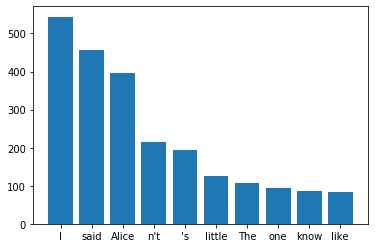

In [55]:
# words without punc and stop words
import nltk
import json
from nltk.corpus import gutenberg
from string import punctuation
from nltk.corpus import stopwords

with open('/Users/wdy940211/Desktop/alice.txt.json', 'r') as f:
    alice = json.load(f)
    sentences = alice['sentences']
    result_all = []
    for n, sentence in enumerate(sentences):
        s = sentences[n]['tokens']
        d = {}
        for it in s:
            d = {'text': it['originalText'], 'lemma': it['lemma'], 'pos': it['pos']}
            result_all.append(d)

without_punc = [d['text'] for d in result_all if d['text'] not in punctuation]
sw = stopwords.words('english')
without_sw = [w for w in without_punc if w not in sw]
further_punc = ['--',r"\'.*"]
clear = [w for w in without_sw if w not in further_punc]
vocab = nltk.FreqDist(clear)

target = list(zip(*vocab.most_common(10)))
plt.bar(*target)
plt.show()

37. Top-ten words co-occurring with ‘Alice’
Extract the list of words that co-occur with the word “Alice”. Visualize with a chart (e.g., bar chart) the top-ten words co-occurring with the word “Alice” and their frequencies.

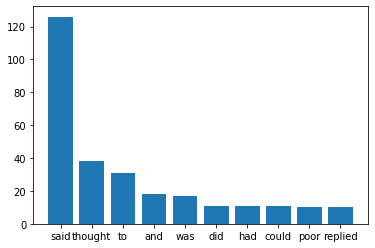

In [2]:
import json
import nltk
from string import punctuation
import matplotlib.pyplot as plt

with open('/Users/wdy940211/Desktop/alice.txt.json', 'r') as f:
    alice = json.load(f)
    sentences = alice['sentences']
    co = []
    for sentence in sentences:
        tokens = sentence['tokens']
        for m, it in enumerate(tokens):
            if it['originalText'] == 'Alice':
                co.append(tokens[m-1]['originalText'])
                co.append(tokens[m+1]['originalText'])

without_punc = [w for w in co if w not in punctuation]
vocab = nltk.FreqDist(without_punc)
target = list(zip(*vocab.most_common(10)))
plt.bar(*target)
plt.show()

38. Histogram
Draw a histogram of word frequency (x-axis is a scalar range representing a frequency ranging from 1 to the largest frequency of a given word in the entire corpus, and the y-axis is the count of unique words that fall into the count of the x value).

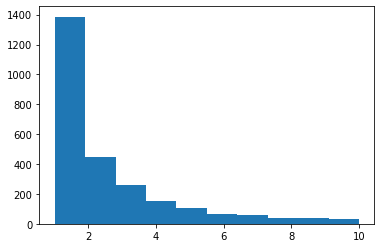

In [3]:
import nltk
import json
from string import punctuation
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

with open('/Users/wdy940211/Desktop/alice.txt.json', 'r') as f:
    alice = json.load(f)
    sentences = alice['sentences']
    result_all = []
    for n, sentence in enumerate(sentences):
        s = sentences[n]['tokens']
        d = {}
        for it in s:
            d = {'text': it['originalText'], 'lemma': it['lemma'], 'pos': it['pos']}
            result_all.append(d)

without_punc = [d['text'] for d in result_all if d['text'] not in punctuation]
sw = stopwords.words('english')
without_sw = [w for w in without_punc if w not in sw]
further_punc = ['--', 'n\'t', '\'s']
clear = [w for w in without_sw if w not in further_punc]

c = Counter(clear)
plt.hist(c.values(), range = (1, 10))
plt.show()

39. Zipf’s law
Plot a log-log graph with the x-axis being rank order and the y-axis being frequency.

/Users/wdy940211/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log


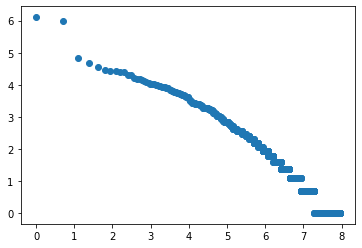

In [4]:
import nltk
import json
from string import punctuation
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

with open('/Users/wdy940211/Desktop/alice.txt.json', 'r') as f:
    alice = json.load(f)
    sentences = alice['sentences']
    result_all = []
    for n, sentence in enumerate(sentences):
        s = sentences[n]['tokens']
        d = {}
        for it in s:
            d = {'text': it['originalText'], 'lemma': it['lemma'], 'pos': it['pos']}
            result_all.append(d)

without_punc = [d['text'] for d in result_all if d['text'] not in punctuation]
sw = stopwords.words('english')
without_sw = [w for w in without_punc if w not in sw]
further_punc = ['--', 'n\'t', '\'s']
clear = [w for w in without_sw if w not in further_punc]

c = Counter(clear)
v = [kv[1] for kv in c.most_common()]
plt.scatter(np.log(range(len(v))), np.log(v))
plt.show()